In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

from subprocess import check_output
print(check_output(["ls", "../input"]).decode("utf8"))

# Any results you write to the current directory are saved as output.

sample_submission.csv
test.csv
train.csv



In [2]:
house_price = pd.read_csv('../input/train.csv')

In [3]:
#Total number of features given to us
print(len(house_price.columns))

81


In [4]:
#Total number of data instances
print(len(house_price))

1460


In [5]:
#What are the data type of each feature
#print(house_price.dtypes)

In [6]:
#Getting detailed description for each feature
house_price.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [7]:
#importing graph and visualisation libraries
import matplotlib.pyplot as plt
import seaborn as sns

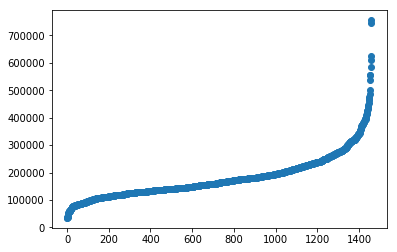

In [8]:
#Distribution of SalePrice
%matplotlib inline
plt.scatter(range(house_price.shape[0]),np.sort(house_price['SalePrice']))

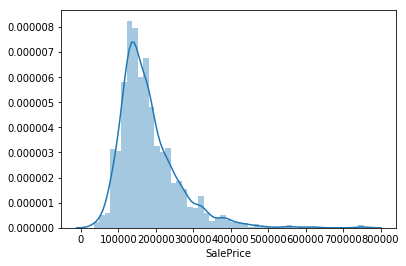

In [9]:
#Distribution of SalePrice
sns.distplot(house_price['SalePrice'],kde=True)

In [10]:
#Distribution is skewed towards left


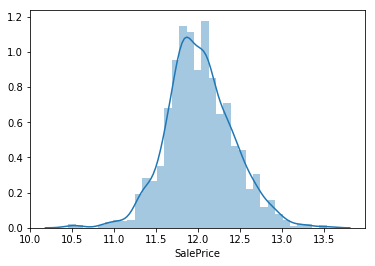

In [11]:
#Distribution for Log(SalePrice)
sns.distplot(np.log(house_price['SalePrice']))

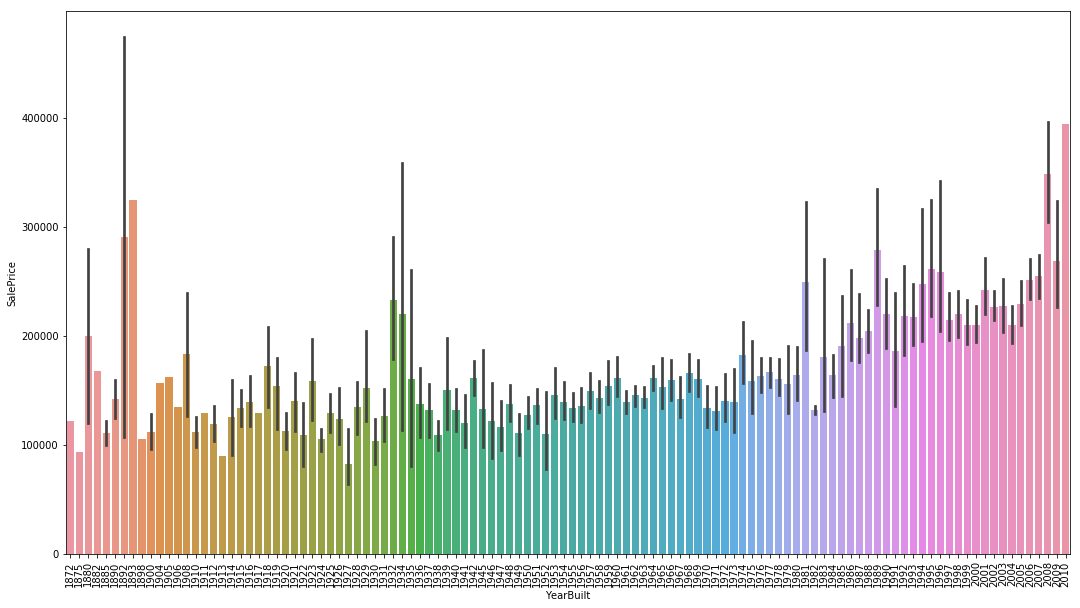

In [12]:
#Checking the mean price of house built in particular year
plt.subplots(figsize=(18,10))
sns.barplot(house_price['YearBuilt'],house_price['SalePrice'])
plt.xticks(rotation='vertical')
plt.show()

In [13]:
#We can see a trend upwards in the long run. But it can be inflation or due to number of houses built
#particular year. Not a great insight

In [14]:
#Count of each type of feature
dftypes_df = house_price.dtypes.reset_index()
dftypes_df.columns = ['count','column_type']
dftypes_df = dftypes_df.groupby('column_type').aggregate('count').reset_index()
dftypes_df

,column_type,count
0,int64,35
1,float64,3
2,object,43


In [15]:
#Plotting the number of missing value for each feature
missing_type = house_price.isnull().sum().reset_index()
missing_type.columns = ['Feature_Name','Number of Missing Value']

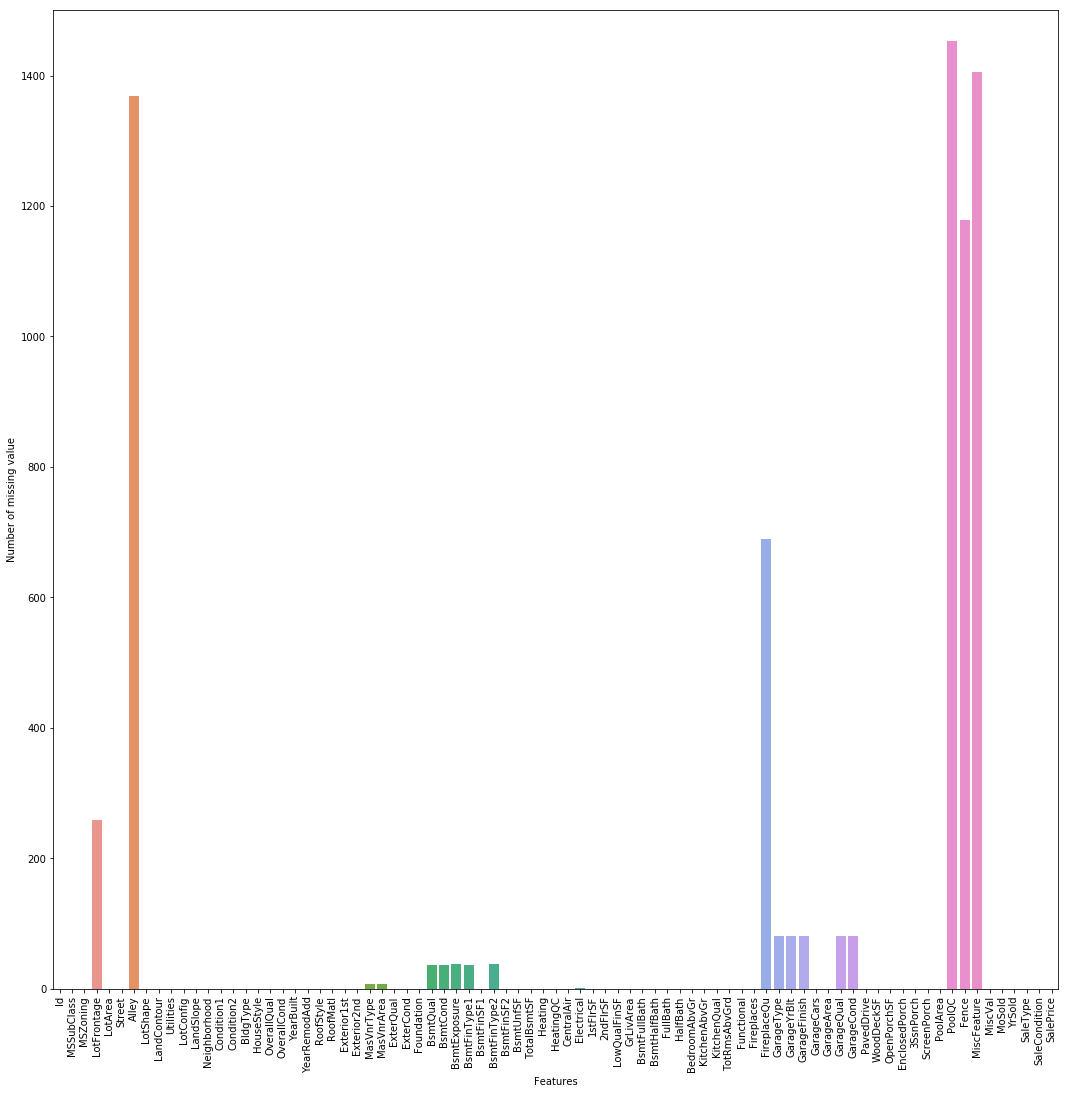

In [16]:
plt.subplots(figsize=(18,18))
plt.ylim(0,1500)
sns.barplot(missing_type['Feature_Name'],missing_type['Number of Missing Value'])
plt.xticks(rotation='vertical')
plt.ylabel('Number of missing value')
plt.xlabel('Features')
plt.show()


In [17]:
#Plot above gives us an idea about which features could be dropped

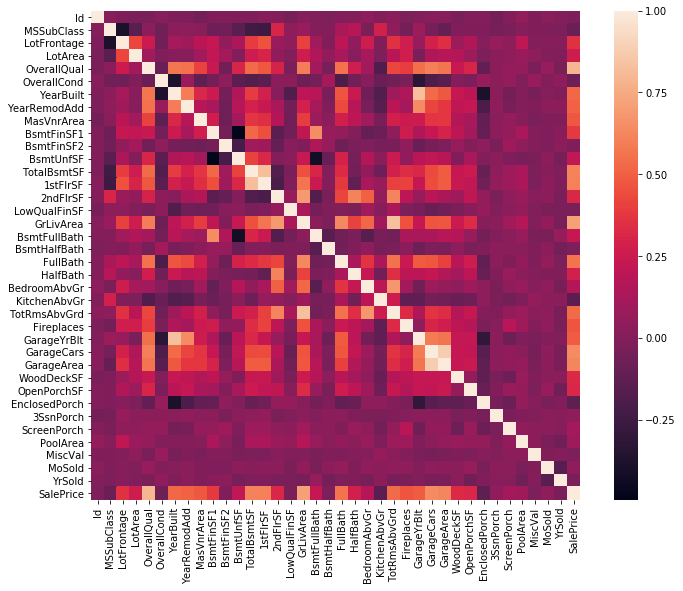

In [18]:
#Plot the correlation matrix for given data
corrmat = house_price.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corrmat,square=True)
plt.show()

In [19]:
# Using xgboost to find feature importance
import xgboost as xgb
from sklearn import preprocessing,model_selection

In [20]:
for f in house_price.columns:
  if house_price[f].dtype == 'object':
    lbl = preprocessing.LabelEncoder()
    lbl.fit(list(house_price[f].values))
    house_price[f] = lbl.transform(list(house_price[f].values))

In [21]:
train_y = house_price.SalePrice.values
train_X = house_price.drop(['SalePrice','Id'],axis=1)

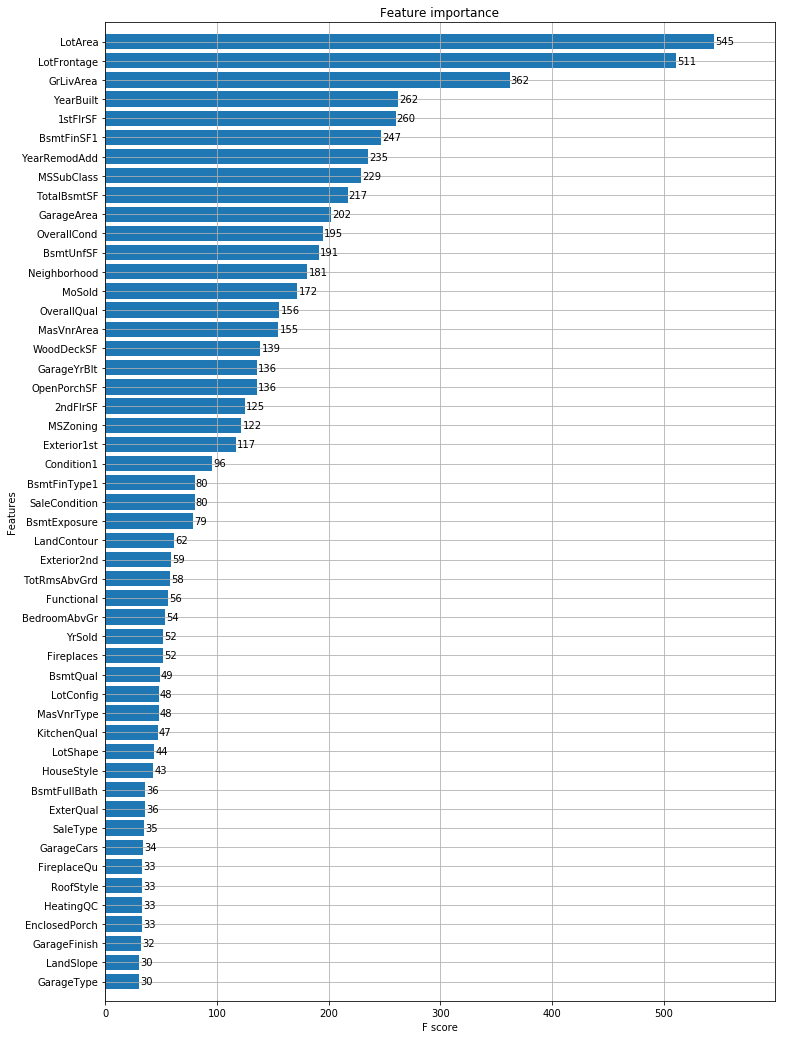

In [22]:
xgb_params = {
    'eta':0.05,
    'max_depth':8,
    'subsample':0.7,
    'colsample_bytree':0.7,
    'objective':'reg:linear',
    'eval_metric':'rmse',
    'silent':1
}

dtrain = xgb.DMatrix(train_X,train_y,feature_names=train_X.columns.values)
model = xgb.train(dict(xgb_params,silent=0),dtrain,num_boost_round=100)

fig,ax = plt.subplots(figsize=(12,18))
xgb.plot_importance(model,max_num_features=50,height=0.8,ax=ax)
plt.show()